In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import openpyxl
import re
import os
from variableUtils import *
from Utils import *
from ClassUtils import *
from pprint import pprint
import json
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from reportlab.lib.pagesizes import letter, landscape, A4, A3
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle, PageBreak, Paragraph, Spacer, Image
from reportlab.lib import colors
from matplotlib.backends.backend_pdf import PdfPages
from reportlab.platypus import Paragraph, Spacer, KeepTogether, KeepInFrame
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.units import inch
from PyPDF2 import PdfReader, PdfWriter
from io import BytesIO
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

(841.68, 1190.8799999999999)


In [ ]:
rawpath = 'BOH2\Viva SHY\data BOH2 Viva.xlsx'
df = pd.read_excel(rawpath)
renameDict = {}
for col in df.columns:
    if not re.match('Q\d.', col):
        continue
    name = df[col].iloc[0]
    name = name.split(' - Assessor Options - ')[-1]
    renameDict[col] = name
folder, file, ext = getFolderandFileName(rawpath)
display(renameDict)
df =df[1:]
mcColumns=list(renameDict.keys())
mcColumnsQ1 = [col for col in mcColumns if 'Q1' in col]
mcColumnsQ2 = [col for col in mcColumns if 'Q2' in col]
mcColumnsQ3 = [col for col in mcColumns if 'Q3' in col]
mcColumnsQ4 = [col for col in mcColumns if 'Q4' in col]
mcColumnsQ5 = [col for col in mcColumns if 'Q5' in col]
mcColumnsQ6 = [col for col in mcColumns if 'Q6' in col]
rubricQues = ['PS', 'ES', 'CS']
for ques in rubricQues:
    df[ques] = df[ques].str.extract('Lvl (\d+)')
colComments=['Comments 1', 'Comments 2', 'Comments 3', 'Comments 4', 'Comments 5', 'Comments 6', 'Overall Comments']
rubricW = {'PS': 0.05, 'ES': 0.1, 'CS': 0.1}
rubricDenom = {'PS': 2, 'ES': 4, 'CS': 4}
rubricValues = {'rubricW': rubricW, 'rubricDenom': rubricDenom, 'rubricQues': rubricQues}

# display(df.head())
df = convertToGuttman(df, colId, colDate, rubricQues, f'{folder}\\{file}.xlsx', 'Sheet1', mcColumns=list(renameDict.keys()), 
                 colCE = colCE, colComments=colComments, rubricValues=rubricValues)

def getsectionscores(df):
    df['Q1 Yes'] = df[mcColumnsQ1].sum(axis=1)
    df['Q1 No'] = df[mcColumnsQ1].apply(lambda x: len(x) - x.sum(), axis=1)
    df['Q1 Score'] = (df['Q1 Yes']/(df['Q1 Yes'] + df['Q1 No'])*100).round(2)

    df['Q2 Yes'] = df[mcColumnsQ2].sum(axis=1)
    df['Q2 No'] = df[mcColumnsQ2].apply(lambda x: len(x) - x.sum(), axis=1)
    df['Q2 Score'] = (df['Q2 Yes']/(df['Q2 Yes'] + df['Q2 No'])*100).round(2)

    df['Q3 Yes'] = df[mcColumnsQ3].sum(axis=1)
    df['Q3 No'] = df[mcColumnsQ3].apply(lambda x: len(x) - x.sum(), axis=1)
    df['Q3 Score'] = (df['Q3 Yes']/(df['Q3 Yes'] + df['Q3 No'])*100).round(2)

    df['Q4 Yes'] = df[mcColumnsQ4].sum(axis=1)
    df['Q4 No'] = df[mcColumnsQ4].apply(lambda x: len(x) - x.sum(), axis=1)
    df['Q4 Score'] = (df['Q4 Yes']/(df['Q4 Yes'] + df['Q4 No'])*100).round(2)

    df['Q5 Yes'] = df[mcColumnsQ5].sum(axis=1)
    df['Q5 No'] = df[mcColumnsQ5].apply(lambda x: len(x) - x.sum(), axis=1)
    df['Q5 Score'] = (df['Q5 Yes']/(df['Q5 Yes'] + df['Q5 No'])*100).round(2)

    df['Q6 Yes'] = df[mcColumnsQ6].sum(axis=1)
    df['Q6 No'] = df[mcColumnsQ6].apply(lambda x: len(x) - x.sum(), axis=1)
    df['Q6 Score'] = (df['Q6 Yes']/(df['Q6 Yes'] + df['Q6 No'])*100).round(2)
    return df

df = getsectionscores(df)
saveDf(df, f'{folder}\\{file} guttman.xlsx', 'Sheet Weighting', len(mcColumns)+10)
display(df.head())
dfAgg = aggregator(df, mcColumns, None, None, colComments, colSupervisor)
convertToGuttman(dfAgg, colId, colDate, rubricQues, f'{folder}\\{file} best.xlsx', 'Sheet1', mcColumns=list(renameDict.keys()), 
                 colCE = colCE, colComments=colComments, rubricValues=rubricValues)
dfAgg = getsectionscores(dfAgg)
saveDf(dfAgg, f'{folder}\\{file} best guttman.xlsx', 'Sheet Weighting', len(mcColumns)+10)
display(dfAgg.head())

In [ ]:
bestPath = 'BOH2\Viva SHY\data BOH2 Viva best guttman.xlsx'
guttmanPath = 'BOH2\Viva SHY\data BOH2 Viva guttman.xlsx'

folder, file, ext = getFolderandFileName(bestPath)
dfBest = pd.read_excel(bestPath)
dfGuttman = pd.read_excel(guttmanPath)
display(dfGuttman[colId].value_counts())
dfGuttman['Total Score'] = dfGuttman['Total Score']*100
dfBest['Total Score'] = dfBest['Total Score']*100
display(dfBest.head())
display(dfGuttman.head())
# for dfGuttman for each colId separate into higher and lower Total Score

Student ID
1452767    2
1472938    2
1472625    2
1452755    2
1461909    2
1443777    2
1461394    2
1387538    2
1452672    2
1464586    2
1472717    2
1469076    2
1455126    2
1460189    2
1452798    2
1463879    2
1473826    2
1472336    2
1473169    2
1472810    2
1460683    2
1469829    2
1337652    2
1472266    2
1473664    2
1472800    2
1088656    2
1353765    2
1452727    2
1473073    2
1472250    2
1462810    2
1419850    2
1443680    2
1472645    2
1461325    2
1472445    2
1472568    2
1472637    2
1473013    2
1462155    2
1461567    2
1472277    2
1280725    2
1472447    2
1463403    2
1460391    2
1461239    2
1472946    2
1270550    2
1461861    2
1462773    2
1472769    2
1462377    2
1423642    2
1452784    2
1377061    2
1463086    2
Name: count, dtype: int64

,Q4._2,Q5._1,PS-1,CS-1,ES-1,Q3._3,Q4._9,PS-2,Q1._7,CS-2,Q4._15,Q3._10,Q4._4,ES-2,Q4._16,Q4._5,Q3._1,Q4._3,Q3._4,Q4._10,Q4._11,Q1._4,Q6._2,Q4._14,Q3._8,Q1._6,Q5.Unknown_1,Q5._2,Q1._1,Q2._4,Q6._6,Q6._5,Q5._3,Q5._7,Q4._17,Q5._4,Q3._11,Q1._2,Q6._4,Q1._3,Q6._1,Q4._13,Q2._1,Q2._3,Q3._9,CS-3,Q6._8,Q3._7,Q4._1,Q3._2,Q6._7,Q1._5,ES-3,Q2._2,Q4._6,Q3._6,Q5._6,Q3._5,Q1._8,Q4._7,Q2._6,Q4._12,Q5._5,Q2._5,Q6._3,Q2._7,Q4._8,Q5._8,CS-4,Q5._9,ES-4,Q5._10,Student ID,Date,Student Given Name,Student Family Name,PS,CS,ES,Finished,Clinical Educator Name,ResponseId,Comments 1,Comments 2,Comments 3,Comments 4,Comments 5,Comments 6,Overall Comments,MC Total,Grand Total,Yes,No,Not Reviewed,Not Filled,Total MC items,MC Score,Rubric Score,Total Score
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,1452767.0,7 Nov 2024,Amy,Vuong,2.0,4.0,3.0,True,"John Kirazis, Milly Mengistu",R_4dFDLLWDH6AILq1,"Prompting on X-ray, but great knowledge",Some prompting but good use of logic,Some prompting but all covered.\n\n moderate p...,"Very knowledgeable, needed a little prompting....","Comprehensive knowledge, just only deficient o...",Good use of logic .overall amazing knowledge base,Standout student this morning. Knowledge base ...,58.0,67.0,58.0,4.0,0.0,0.0,62.0,0.94,0.9,93.0
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1463879.0,7 Nov 2024,Ella,Sheahan,2.0,4.0,4.0,True,"Lakshmi Gade, Clare McNally",R_4uX2R7wUGR6dwy7,Categorised as less than 1% BL but preferred t...,Needed a little prompting to provide the justi...,Didn’t think about dexterity issues due to inj...,Very well answered and covered everything \n\n...,Wasn’t very comfortable to consider liner or b...,Couldn’t think about acyclovir otherwise cover...,Overall strong understanding but needed some p...,56.0,66.0,56.0,6.0,0.0,0.0,62.0,0.90,1.0,92.0
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1443680.0,7 Nov 2024,Anicca,Lee,2.0,4.0,4.0,True,"Lakshmi Gade, Clare McNally",R_4f9jqdKB9kC2MNi,Progression overtime and type of \nCAL and fur...,Hopeful to questionable and thinks loosing two...,Prompting needed around choosing type of tooth...,Very good clarity determining relevant investi...,Good clarity around the management approach bu...,Initially thought it was verrucous lesion but ...,Thorough knowledge with overall management of ...,56.0,66.0,56.0,6.0,0.0,0.0,62.0,0.90,1.0,92.0
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,0,1,0,0,0,1419850.0,7 Nov 2024,Zahra,Khatibi,2.0,4.0,3.0,True,"Eunice Powell, Hafize Coskun",R_4MlLLnZXmKfXuno,NaN,Missing some detail in understanding of smokin...,Speaking a bit quickly and quietly \nExcellent...,Thorough approach but with moderate prompting,Good knowledge base \n\n Excellent considerati...,NaN,Student has excellent knowledge base but needs...,56.0,65.0,56.0,6.0,0.0,0.0,62.0,0.90,0.9,90.0
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,0,1,1,1,0,1472645.0,7 Nov 2024,Alicia,Feng,2.0,4.0,4.0,True,"Lakshmi Gade, Clare McNally",R_4BIjcUCiV8T66Fb,Started off nervous but managed to cover every...,Didn’t talk about dosage vs perio \n\n Good pr...,Had to redirect student to concentrate on prev...,Very well answered all the tests required \n\n...,Prompting required to elaborate on selective c...,"Since it’s an unknown question, we had to brea...",Demonstrated good knowledge and overall unders...,55.0,65.0,55.0,7.0,0.0,0.0,62.0,0.89,1.0,91.0


,CS-1,PS-1,ES-1,Q5._1,Q4._2,Q1._7,PS-2,Q4._9,CS-2,Q4._15,Q3._4,Q3._1,Q3._3,Q3._10,ES-2,Q4._16,Q4._4,Q4._3,Q1._4,Q6._2,Q4._5,Q4._14,Q5._2,Q4._11,Q1._6,Q5._3,Q3._8,Q1._1,Q5._7,Q6._6,Q4._13,Q2._4,Q6._5,Q6._4,Q5._4,Q4._10,Q5.Unknown_1,Q1._2,Q4._17,Q6._1,Q1._3,Q3._11,Q2._1,Q2._3,Q3._7,Q1._5,Q3._9,Q3._2,Q6._7,CS-3,Q4._6,Q6._8,Q4._1,Q3._6,ES-3,Q2._2,Q3._5,Q4._7,Q5._6,Q1._8,Q2._6,Q6._3,Q4._12,Q4._8,Q2._7,Q5._8,Q2._5,Q5._5,CS-4,Q5._9,Q5._10,ES-4,Student ID,Date,Student Given Name,Student Family Name,PS,CS,ES,Finished,Clinical Educator Name,ResponseId,Comments 1,Comments 2,Comments 3,Comments 4,Comments 5,Comments 6,Overall Comments,MC Total,Grand Total,Yes,No,Not Reviewed,Not Filled,Total MC items,MC Score,Rubric Score,Total Score
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0,1,1,1,1,1,1.0,1.0,1,1,1.0,1,1,1,NaN,1,1,1,1,1,1,1,1,1,1,1,1.0,1,1,1.0,0,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1.0,1,0.0,0.0,0,1452767.0,7 Nov 2024,Amy,Vuong,2.0,4.0,3.0,True,John Kirazis,R_4dFDLLWDH6AILq1,"Prompting on X-ray, but great knowledge",Some prompting but good use of logic,Some prompting but all covered.,"Very knowledgeable, needed a little prompting.","Comprehensive knowledge, just only deficient o...",Good use of logic .overall amazing knowledge base,Standout student this morning. Knowledge base ...,56.0,65.0,56.0,5.0,0.0,1.0,62.0,0.92,0.9,92.0
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0,1,1,1,1,1,1.0,1.0,1,1,1.0,1,1,1,1.0,1,1,1,1,0,1,1,1,1,0,1,1.0,1,1,1.0,0,1,1,0,0,1,1,0,1,1,1,1,0,1,1,1.0,1,1.0,0.0,1,1463879.0,7 Nov 2024,Ella,Sheahan,2.0,4.0,4.0,True,Lakshmi Gade,R_4uX2R7wUGR6dwy7,Categorised as less than 1% BL but preferred t...,NaN,Didn’t think about dexterity issues due to inj...,Very well answered and covered everything,Wasn’t very comfortable to consider liner or b...,Couldn’t think about acyclovir otherwise cover...,Overall strong understanding but needed some p...,54.0,64.0,54.0,8.0,0.0,0.0,62.0,0.87,1.0,90.0
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0,1,1,1,1,1,1.0,1.0,1,1,1.0,1,1,1,1.0,1,1,1,1,1,1,1,1,1,1,1,1.0,1,1,1.0,1,1,1,1,1,1,1,1,0,1,0,1,1,0,0,0.0,1,0.0,0.0,0,1419850.0,7 Nov 2024,Zahra,Khatibi,2.0,4.0,3.0,True,Eunice Powell,R_4MlLLnZXmKfXuno,NaN,Missing some detail in understanding of smokin...,Speaking a bit quickly and quietly \nExcellent...,Thorough approach but with moderate prompting,Good knowledge base,NaN,Student has excellent knowledge base but needs...,55.0,64.0,55.0,7.0,0.0,0.0,62.0,0.89,0.9,89.0
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,1,1,1,0,1,1.0,1.0,1,1,1.0,1,1,1,1.0,1,1,1,1,1,1,1,1,0,1,1,1.0,1,1,0.0,0,1,1,0,0,1,1,1,1,1,0,1,0,1,1,1.0,1,1.0,1.0,1,1443680.0,7 Nov 2024,Anicca,Lee,2.0,4.0,4.0,True,Lakshmi Gade,R_4f9jqdKB9kC2MNi,Progression overtime and type of \nCAL and fur...,Hopeful to questionable and thinks loosing two...,Prompting needed around choosing type of tooth...,Very good clarity determining relevant investi...,Good clarity around the management approach bu...,Initially thought it was verrucous lesion but ...,Thorough knowledge with overall management of ...,53.0,63.0,53.0,9.0,0.0,0.0,62.0,0.85,1.0,88.0
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0,1,1,1,1,1,1.0,1.0,0,1,1.0,1,1,1,1.0,1,1,1,1,1,1,1,1,1,1,1,0.0,1,1,0.0,0,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0.0,1,1.0,0.0,1,1472645.0,7 Nov 2024,Alicia,Feng,2.0,4.0,4.0,True,Lakshmi Gade,R_4BIjcUCiV8T66Fb,Started off nervous but managed to cover every...,Didn’t talk about dosage vs perio,Had to redirect student to concentrate on prev...,Very well answered all the tests required \n\n...,Prompting required to elaborate on selective c...,"Since it’s an unknown question, we had to brea...",Demonstrated good knowledge and overall unders...,53.0,63.0,53.0,9.0,0.0,0.0,62.0,0.85,1.0,88.0


In [19]:
# Assuming 'colId' identifies each student
# Sort each group by 'Total Score' in descending order so that the highest score comes first
dfGuttman_sorted = dfGuttman.sort_values([colId, 'Total Score'], ascending=[True, False])

# Split into two dataframes: one for higher scores and one for lower scores for each student
higher_scores = dfGuttman_sorted.groupby(colId).head(1).reset_index(drop=True)
higher_scores.sort_values('Total Score', ascending=False, inplace=True)
lower_scores = dfGuttman_sorted.groupby(colId).tail(1).reset_index(drop=True)
lower_scores.sort_values('Total Score', ascending=False, inplace=True)
newRubricQues = []
for col in higher_scores.columns:
    for pattern in newRubricQuesPatterns:
        if re.match(pattern, col):
            newRubricQues.append(col)
print(newRubricQues)
calcCols = mcColumns + newRubricQues
higher_scores.loc['Column Total'] = higher_scores[calcCols].sum(axis=0)
lower_scores.loc['Column Total'] = lower_scores[calcCols].sum(axis=0)
higher_scores.sort_values('Column Total', axis=1, ascending=False, inplace=True)
lower_scores.sort_values('Column Total', axis=1, ascending=False, inplace=True)
saveDf(higher_scores, f'{folder}\\{file} separated.xlsx', 'higher', len(mcColumns) + 10)
saveDf(lower_scores, f'{folder}\\{file} separated.xlsx', 'lower', len(mcColumns) + 10)
# lower_scores.to_excel(f'{folder}\\{file} lower.xlsx', index=False)

['CS-1', 'PS-1', 'ES-1', 'PS-2', 'CS-2', 'ES-2', 'CS-3', 'ES-3', 'CS-4', 'ES-4']


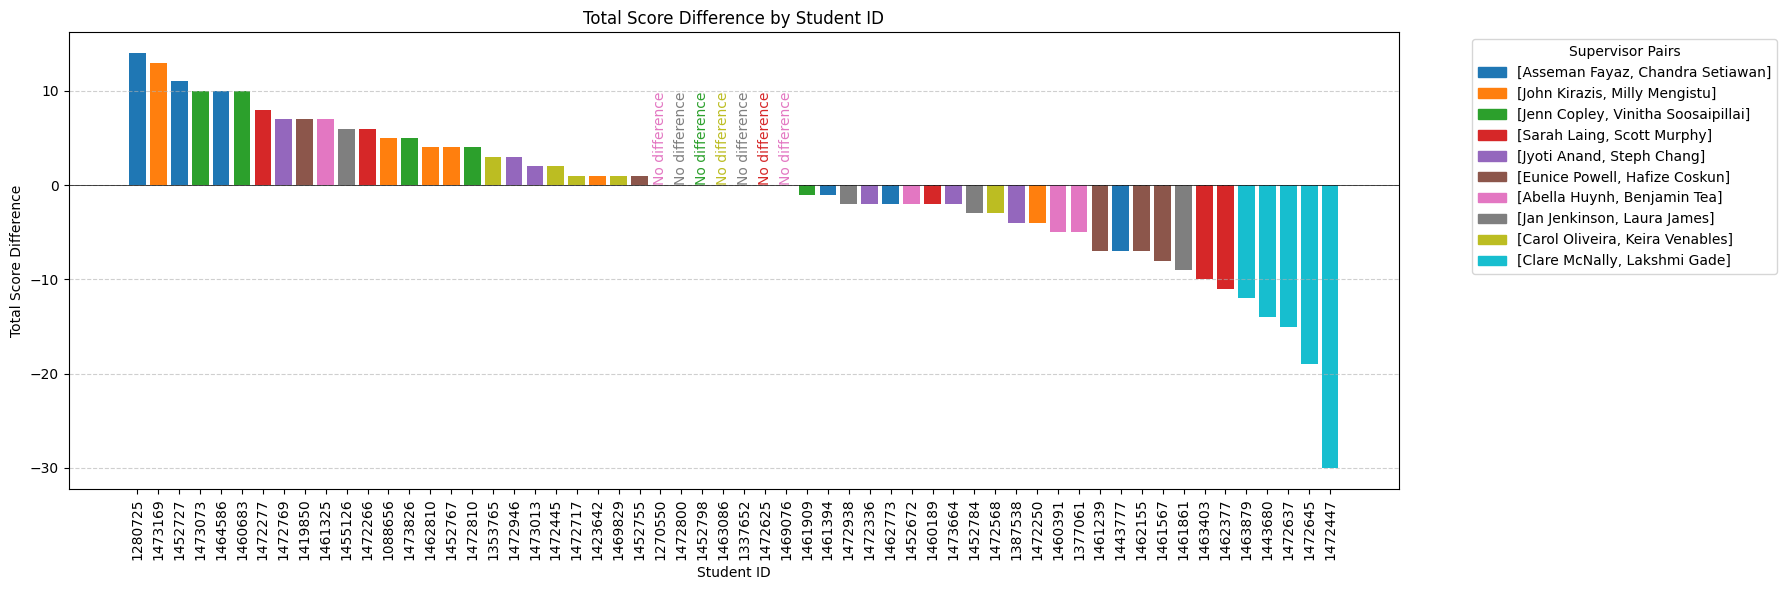

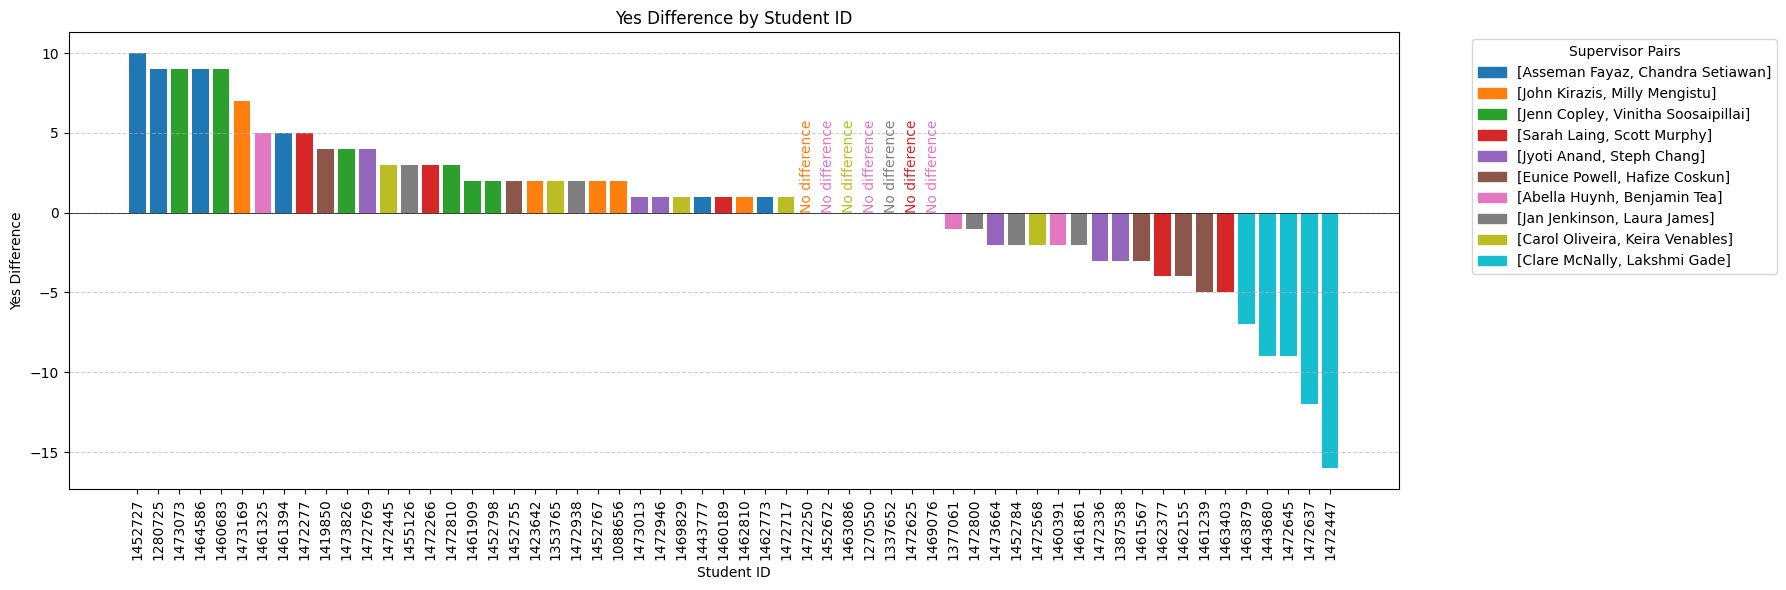

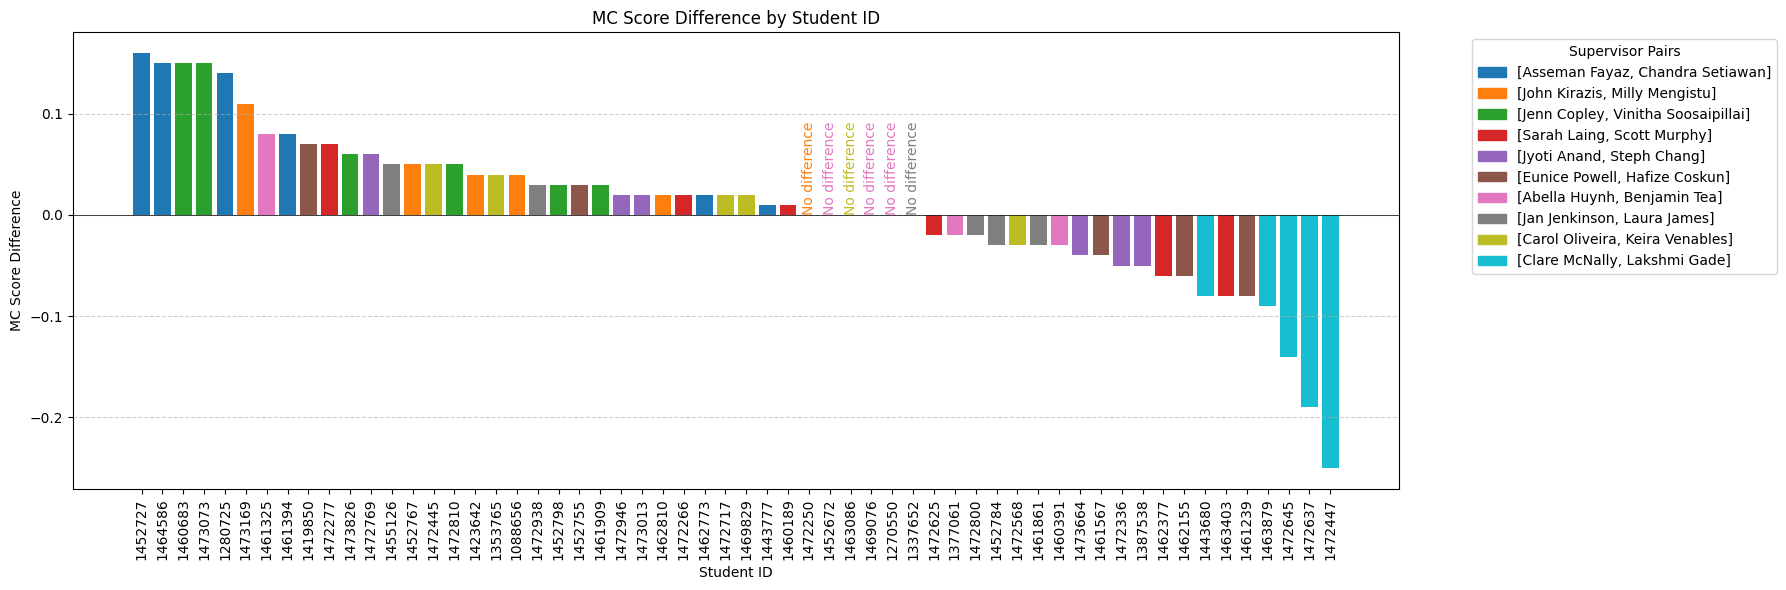

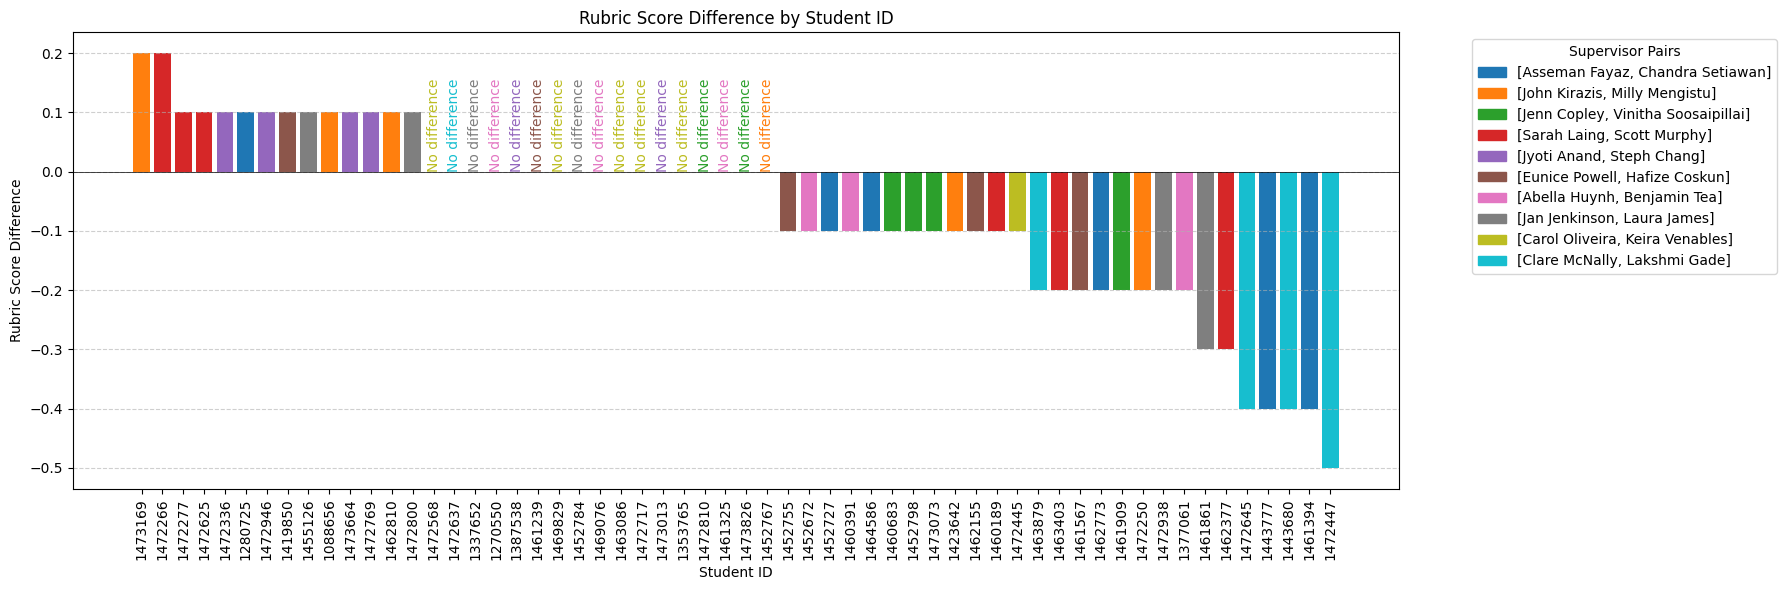

In [14]:
# import Rectangle
from matplotlib.patches import Rectangle
def getSupervisorPairs(dfMarks, dfBest, folder, file):
    df = dfMarks.copy()
    df.sort_values(by=colSupervisor, inplace=True)

    # Create a new DataFrame to store the differences and supervisor pair information
    comparison_data = []

    # Group by 'Student ID' to find pairs of rows for the same student
    grouped = df.groupby('Student ID')

    for student_id, group in grouped:
        if len(group) == 2:
            supervisor1 = group.iloc[0][colSupervisor]
            supervisor2 = group.iloc[1][colSupervisor] 
            yes_diff = group.iloc[0]['Yes'] - group.iloc[1]['Yes']
            mc_score_diff = group.iloc[0]['MC Score'] - group.iloc[1]['MC Score']
            rubric_weighted_score_diff = group.iloc[0]['Rubric Score'] - group.iloc[1]['Rubric Score']
            total_score_diff = group.iloc[0]['Total Score'] - group.iloc[1]['Total Score']
            
            comparison_data.append({
                'Student ID': student_id,
                'Supervisor Pair': f"[{supervisor1}, {supervisor2}]",
                'Yes Difference': yes_diff,
                'MC Score Difference': mc_score_diff,
                'Rubric Score Difference': rubric_weighted_score_diff,
                'Total Score Difference': total_score_diff
            })

    # Convert the list of dictionaries to a DataFrame
    comparison_df = pd.DataFrame(comparison_data)
    # add the Supervisor Pair column to the best df, using the Student ID as the matching key

    if dfBest is not None:
        dfBest = dfBest.merge(comparison_df[['Student ID', 'Supervisor Pair']], on='Student ID', how='left')


    # Sort the DataFrame by 'Total Score Difference' in descending order
    comparison_df_sorted = comparison_df.sort_values(by='Total Score Difference', ascending=False)
    comparison_df_sorted['Student ID'] = comparison_df_sorted['Student ID'].astype(int)

    # Set the color palette
    unique_supervisor_pairs = comparison_df_sorted['Supervisor Pair'].unique()
    color_palette = plt.cm.get_cmap('tab10', len(unique_supervisor_pairs))
    color_dict = {pair: color_palette(i) for i, pair in enumerate(unique_supervisor_pairs)}


    # Redefining the plot function to include text for zero values
    def plot_integer_bar_chart(df, y_column, title):
        sorted_df = df.sort_values(by=y_column, ascending=False)
        plt.figure(figsize=(18, 6))
        bars = plt.bar(sorted_df['Student ID'].astype(str), sorted_df[y_column], color=[color_dict[pair] for pair in sorted_df['Supervisor Pair']])
        
        # Add text "No difference" where the bar height is zero
        for bar, pair in zip(bars, sorted_df['Supervisor Pair']):
            if bar.get_height() == 0:
                plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.0, 'No difference', ha='center', va='bottom', color=color_dict[pair], rotation=90)
        
        plt.xlabel('Student ID')
        plt.ylabel(y_column)
        plt.title(title)
        plt.xticks(rotation=90, ha='center')
        # show the zero line
        plt.axhline(0, color='black', linewidth=0.5)
        # Create a legend
        handles = [Rectangle((0, 0), 1, 1, color=color_dict[pair]) for pair in unique_supervisor_pairs]
        plt.legend(handles, unique_supervisor_pairs, title="Supervisor Pairs", bbox_to_anchor=(1.05, 1), loc='upper left')
        
        plt.tight_layout()
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.savefig(f'{folder}/{file} {y_column}.png', bbox_inches='tight')
        plt.show()

    # Plotting the bar charts with integer Student ID and 90-degree label rotation
    plot_integer_bar_chart(comparison_df_sorted, 'Total Score Difference', 'Total Score Difference by Student ID')
    plot_integer_bar_chart(comparison_df_sorted, 'Yes Difference', 'Yes Difference by Student ID')
    plot_integer_bar_chart(comparison_df_sorted, 'MC Score Difference', 'MC Score Difference by Student ID')
    plot_integer_bar_chart(comparison_df_sorted, 'Rubric Score Difference', 'Rubric Score Difference by Student ID')

    # Show counts of each pair
    pair_counts = comparison_df_sorted['Supervisor Pair'].value_counts().reset_index()
    pair_counts.columns = ['Supervisor Pair', 'Count']
    # display(pair_counts)
    return pair_counts, comparison_df_sorted, dfBest

pairCounts, comparison_df_sorted, dfBest = getSupervisorPairs(dfGuttman, dfBest, folder, file)

In [4]:
pageSize = ( 11.69 * inch, 8.27 * 2 * inch) # page size
print(pageSize)
figSize = (pageSize[0] / 100, pageSize[1] / 100)

# Define the margins
leftMargin = 0 * inch
rightMargin = 0 * inch
topMargin = 1 * inch
bottomMargin = 0 * inch
# Define styles
# Define the styles for the headings
styles = getSampleStyleSheet()
styles.add(ParagraphStyle(name='Center', alignment=1))  # Center alignment
headingStyle = ParagraphStyle('Heading1', parent=styles['Heading1'], fontSize=32, alignment=1)  # Centered
heading2Style = ParagraphStyle('Heading2', parent=styles['Heading2'], fontSize=28, alignment=1)  # Centered
subheadingStyle = ParagraphStyle('Heading2', parent=styles['Heading2'], fontSize=24, alignment=1)  # Centered
subsubheadingStyle = ParagraphStyle('Heading3', parent=styles['Heading3'], fontSize=20, alignment=1)  # Centered
normalLargeStyleLeft = ParagraphStyle('NormalLarge', parent=styles['Normal'], fontSize=18, alignment=0)  # Left aligned
normalLargeStyleCenter = ParagraphStyle('NormalLarge2', parent=styles['Normal'], fontSize=18, alignment=1)  # Center aligned
tableTextStyle = ParagraphStyle('LargeFont', parent=styles['Normal'], fontSize=13, alignment=1)
tableTextStyleSmall= ParagraphStyle('SmallFont', parent=styles['Normal'], fontSize=11, alignment=1)
Checklistcolors = {'Yes': 'blue', 'No': 'orange', 'Not Reviewed': 'lightgrey'}
# Set the colorblind-friendly palette
sns.set_palette("colorblind")

elements = []

def plotPie(ax, valueCounts, title, colors=None):
    # print(valueCounts)
    # define a fixed colour palette color blind friendly
    # print(valueCounts.index)
    colorList = [colors[val] for val in valueCounts.index] if colors is not None else None
    total = valueCounts.values.sum()
    # print(total)
    def autopct(pct):
        val = int(round(pct * total / 100.0))
        return '{:.0f}%\n({v:d})'.format(pct, v=val) if pct > 0 else ''
    
    wedges, texts, autotexts = ax.pie(valueCounts, labels=valueCounts.index, autopct=autopct, startangle=90, colors=sns.color_palette() if colorList is None else colorList,
            wedgeprops={'edgecolor': 'black', 'linewidth': 0.35}, labeldistance = 0.7, pctdistance=1.15, textprops={'color': 'black', 'fontsize': 7})
    for autotext in texts:
        autotext.set_color('black')
        autotext.set_fontsize(10)
    ax.set_title(title)

def createPlotImage( fig):
        buf = BytesIO()
        fig.savefig(buf, format='png', bbox_inches='tight')
        buf.seek(0)
        return buf

def addPlotImage(fig, ratio = None, header=None):
        plotImage = createPlotImage(fig)
        image = Image(plotImage)
        # print(image.drawWidth, image.drawHeight)
        
        # Resize image to fit within margins
        max_height = pageSize[1] - topMargin - bottomMargin  # Max height for Page
        max_width = pageSize[0] - leftMargin - rightMargin  # Max width for Page
        if ratio is not None:
            max_width = max_width * ratio
            max_height = max_height * ratio
        aspect_ratio = min(max_width / image.drawWidth, max_height / image.drawHeight)
        image.drawWidth *= aspect_ratio
        image.drawHeight *= aspect_ratio
        # print(image.drawWidth, image.drawHeight, aspect_ratio)
        if header is not None:
            image = KeepTogether([header, Spacer(1, 12), image])
        elements.append(image)
        # if idx + 1 < numSubplots:
        #    self.elements.append(PageBreak())
        #self.elements.append(PageBreak())
        plt.close(fig)

def createSubplot(ax, subset, show_legend=False, colors = None, xticks = None):
     
        subset.plot(kind='bar', stacked=True, ax=ax, edgecolor='black', color=colors if colors is not None else sns.color_palette(), legend=show_legend)
        # Add the legend only if show_legend is True
        if show_legend:
            ax.legend(title='', loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes)
        ax.set_xlabel('')
        ax.set_ylabel('Count')
        # desired_ticks = range(len(xticks))
        # print(desired_ticks)
        # ax.set_xticks(range(len(xticks)))
        # ax.set_xticklabels(xticks)
        # y ticks should be integers
        ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
        # ylim should start from 0
        ax.set_ylim(0, ax.get_ylim()[1] * 1.1)
        # minimum gap of y ticks is 1
        if ax.get_ylim()[1] < 5:
            ax.yaxis.set_major_locator(plt.MultipleLocator(1))
        # Show gridlines on the y-axis
        ax.grid(axis='y', linestyle='--', alpha=0.6)
        # Convert index to strings to avoid errors with re.sub
        subset.index = [str(i) for i in subset.index]
        # x tick labels, remove _ and put space
        # subset.index = [processLabel(i) for i in subset.index]
        ax.set_xticklabels(subset.index, rotation=45, ha='center')

        # Check for bars with total value of zero
        for i, total in enumerate(subset.sum(axis=1)):
            if total == 0 and subset.index[i] != '':
                # Overlay 'No data available' text vertically, adjusted lower
                ax.text(i, ax.get_ylim()[0] + 0.25 * ax.get_ylim()[1], 'No data available', 
                        ha='center', va='center', rotation=90, fontsize=10, color='black', alpha=0.7)

def addGraphs(countsDf, maxBars = 6, maxNSubplots = 6, nCols=2, colors = None, dynamicHeight = True, startingSubplots = None, header=None):
        df = countsDf.copy()

        # Number of rows and columns for subplots
        numSubplots = len(df) // maxBars + (1 if len(df) % maxBars > 0 else 0)
        if len(df) < maxBars:
            maxBars = len(df)
        maxRows = maxNSubplots // nCols
        if dynamicHeight:
            maxRows = int(np.ceil(min(numSubplots, maxNSubplots)/ nCols))
        # Display starting subplots number of plots on the first page
        if startingSubplots is None:
            startingSubplots = maxNSubplots
            lastPageSubplots = numSubplots % maxNSubplots
        else:
            alreadyNumPlots = 3 - startingSubplots
            if alreadyNumPlots + numSubplots <= 3:
                lastPageSubplots = (alreadyNumPlots + numSubplots)
            else:
                lastPageSubplots = abs(numSubplots - startingSubplots) % maxNSubplots
            startingSubplots = min(startingSubplots, numSubplots)

        # Loop over the DataFrame and create subplots
        # for i in range(0, numSubplots, maxNSubplots):
        i = 0
        while i < numSubplots:
            if i == 0:
                    current_subplots = startingSubplots
            else:
                    current_subplots = maxNSubplots
            # print(i, current_subplots, (figsize[0], figsize[1] / maxNSubplots * current_subplots))
            nRows = int(np.ceil(current_subplots/nCols))
            fig, axes = plt.subplots(nrows=nRows, ncols=nCols, figsize=(figSize[0], figSize[1] / maxRows * nRows))
            if current_subplots == 1:
                axes = [axes]
            else:
                axes = axes.flatten()
            
            for j in range(current_subplots):
                idx = i + j
                if idx < numSubplots:
                    start_idx = idx * maxBars
                    end_idx = start_idx + maxBars
                    subset = df.iloc[start_idx:end_idx]
                    xticks = subset.index
                    # If there are fewer than maxBars, pad with empty rows
                    if len(subset) < maxBars:
                        empty_rows = pd.DataFrame(0, index=[''] * (maxBars - len(subset)), columns=subset.columns)
                        subset = pd.concat([subset, empty_rows])
                    # Show legend only for the first subplot
                    createSubplot(axes[j], subset, show_legend=(i == 0 and j == 0), colors=colors, xticks=xticks)
                else:
                    axes[j].remove()
            i+=current_subplots
            # fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=fig.transFigure)
            plt.subplots_adjust(hspace=0.4)
            # plt.suptitle('Counts for each item')
            fig.tight_layout(rect=[0, 0, 1, 1])  # Adjust layout to make room for the legend
            
            addPlotImage(fig, 0.9, header)
            if idx + 1 < numSubplots:
                elements.append(PageBreak())
            #self.elements.append(PageBreak())
            plt.close(fig)

def addMCReferenceTable( mcRefdf, header):
        
        if mcRefdf is None:
            elements.append(Paragraph("No marking checklist reference found", subsubheadingStyle))
            return
        largeFontStyle = ParagraphStyle('LargeFont', parent=styles['Normal'], fontSize=13, alignment=0)

        # Create a table with MC and Full Text columns
        data = [mcRefdf.columns.to_list()] + mcRefdf.values.tolist()
        for i in range(1, len(data)):
            data[i][1] = Paragraph(data[i][1], largeFontStyle)
            data[i][0] = Paragraph(data[i][0], largeFontStyle)
        table = Table(data, colWidths=[1.5 * inch, 9 * inch])

        # Set the style for the table text as large font
        

        table_style = TableStyle([
            ('BACKGROUND', (0, 0), (-1, 0), colors.HexColor('#236DB0')),  # Header row
            ('TEXTCOLOR', (0, 0), (-1, 0), colors.HexColor('#FFFFFF')),  # Header text
            ('ALIGN', (0, 0), (-1, -1), 'CENTER'),  # Center align all cells
            ('VALIGN', (0, 0), (-1, -1), 'MIDDLE'),  # Center align all cells
            ('GRID', (0, 0), (-1, -1), 1, colors.black),  # Add border around cells
            ('ALIGN', (3, 1), (3, -1), 'LEFT'),  # Left align Reason column cells
            ('FONTNAME', (0, 0), (-1, -1), 'Helvetica-Bold'),  # Change font to bold
            ('FONTSIZE', (0, 0), (-1, -1), 14),  # Increase font size
            ('BOTTOMPADDING', (0, 0), (-1, -1), 6),  # Increase bottom padding
            ('TOPPADDING', (0, 0), (-1, -1), 6),  # Increase top padding
        ])
        table.setStyle(table_style)
        mergedElement = KeepTogether([header, Spacer(1, 12), table])
        return mergedElement

(841.68, 1190.8799999999999)


In [5]:
elements.append(Paragraph('BOH2 Viva Analysis', headingStyle))
elements.append(Spacer(1, 32))
rubricQues = variableUtils.rubricQues.copy()
rubricQues.remove('TS')
rubricTitle = {'PS': 'Professionalism', 'CS': 'Communication', 'TS': 'Time Management', 'ES': 'Entrustment'}
# Plotting the pie chart for rubric questions columns
rubricheader = Paragraph('Overall Rubric Scores', subheadingStyle)

mcColumns = [col for col in dfGuttman.columns if '#' in col]
mcColumns=list(renameDict.keys())
labelBlank = 'Not Filled'
countsDfMC = pd.DataFrame(index=mcColumns, columns=['Yes', 'No', 'Not Reviewed', labelBlank])
for col in mcColumns:
    countsDfMC.at[col, 'Yes'] = (dfBest[col] == 1).sum()
    countsDfMC.at[col, 'No'] = (dfBest[col] == 0).sum()
    countsDfMC.at[col, 'Not Reviewed'] = (dfBest[col] == 'NA').sum()
    countsDfMC.at[col, labelBlank] = (dfBest[col] == '').sum() + dfBest[col].isna().sum()
countsDfMC.sort_values(by='Yes', ascending=False, inplace=True)
display(countsDfMC)
quesNameDict = {}
for idx in countsDfMC.index:
    # print(idx)
    section = idx.split('.')[0]
    if section not in quesNameDict:
        quesNameDict[section] = []
    quesNameDict[section].append(idx)
print(quesNameDict)
fig, axes = plt.subplots(2, 2, figsize=(figSize[0]/1.2, figSize[1]/1.2))
colorsList = {1:'#0072B2', 2: '#E69F00', 3: '#009E73', 4: '#F0E442'}
axes = axes.flatten()
validAxes = 0
# display(self.rubricGroupedDf)
# replace 0 with 1
rubricGroupedDf = dfBest[rubricQues]
# All cols as int
for col in rubricQues:
    rubricGroupedDf[col] = rubricGroupedDf[col].astype('Int64')
rubricGroupedDf.replace(0, 1, inplace=True)
for i, col in enumerate(rubricQues):
    valueCounts = rubricGroupedDf[col].value_counts()
    valueCounts.sort_index(inplace=True, ascending=False)
    if len(valueCounts) == 0:
        continue
    plotPie(axes[validAxes], valueCounts, rubricTitle[col], colorsList)
    validAxes += 1

for ax in axes[validAxes:]:
    fig.delaxes(ax)
plt.subplots_adjust(hspace=0.2, wspace=0.5)
plt.tight_layout()

addPlotImage(fig, 0.9, rubricheader)


# Plotting the pie chart for Questions for each section, aggregated for each section
fig, axes = plt.subplots(3, 3, figsize=(figSize[0]/1.2, figSize[1]/1.2))
axes = axes.flatten()
validAxes = 0
for section in sorted(quesNameDict.keys()):
    quesList = quesNameDict[section]
    # print(section, quesList)
    # Get counts of Yes, No, Not Reviewed, Blank for each section
    sectionCounts = countsDfMC.loc[quesList].sum()
    # display(sectionCounts)
    # Only keep Yes and No
    sectionCounts = sectionCounts[['Yes', 'No']]
    # Plot the pie charts
    plotPie(axes[validAxes], sectionCounts, section, Checklistcolors)
    validAxes += 1

for ax in axes[validAxes:]:
    fig.delaxes(ax)
plt.subplots_adjust(hspace=0.2, wspace=0.5)
plt.tight_layout()
addPlotImage(fig, 0.9, Paragraph(' Marking Checklist Section scores', subheadingStyle))

elements.append(PageBreak())
# For each question, plot the stacked bar chart for Yes, No
countsDfMC = countsDfMC.sort_values(by='Yes', ascending=False)
countsDfMC = countsDfMC[['Yes', 'No']]
elements.append(Paragraph('Scores for Each Marking Checklist Question', subheadingStyle))
addGraphs(countsDfMC, maxBars=12, maxNSubplots=4, nCols=1, colors=['blue', 'orange'], dynamicHeight=True)

# For each question, plot the stacked bar chart for Yes, No divided by each section
for section in sorted(quesNameDict.keys()):
    quesList = quesNameDict[section]
    sectionCounts = countsDfMC.loc[quesList]
    sectionCounts = sectionCounts[['Yes', 'No']]
    sectionCounts = sectionCounts.sort_values(by='Yes', ascending=False)
    # sectionCounts = sectionCounts.transpose()
    display(sectionCounts)
    header = Paragraph(f'Scores for Each Marking Checklist Question in {section}', subheadingStyle)
    # get the respective names from renameDict
    thisrenameDict = {col: renameDict[col] for col in sectionCounts.index} 
    thisrenameDf = pd.DataFrame(thisrenameDict.items(), columns=['MC', 'Full Text'])
    thisrenameDf['digitAfterUnderscore'] = thisrenameDf['MC'].str.split('_').str[1].astype(int)

    # Sort the DataFrame based on the extracted digit
    thisrenameDf = thisrenameDf.sort_values(by='digitAfterUnderscore')

    # Drop the helper column if not needed anymore
    thisrenameDf = thisrenameDf.drop(columns=['digitAfterUnderscore'])
    # thisrenameDf.sort_values(by='MC', inplace=True)
    # create a table for the marking checklist reference
    refTable = addMCReferenceTable(thisrenameDf, header)
    addGraphs(sectionCounts, maxBars=13, maxNSubplots=4, nCols=1, colors=['blue', 'orange'], dynamicHeight=False, startingSubplots=None, header=refTable)

# Save the pdf
doc = SimpleDocTemplate(f'{folder}/ viva report.pdf', pagesize=pageSize, rightMargin=rightMargin, leftMargin=leftMargin, topMargin=topMargin, bottomMargin=bottomMargin)
doc.build(elements)


,Yes,No,Not Reviewed,Not Filled
Q4._2,58,0,0,0
Q5._1,58,0,0,0
Q3._3,57,1,0,0
Q1._7,57,1,0,0
Q4._9,57,1,0,0
Q4._15,56,2,0,0
Q4._4,55,3,0,0
Q3._10,55,3,0,0
Q4._5,54,4,0,0
Q4._16,54,4,0,0


{'Q4': ['Q4._2', 'Q4._9', 'Q4._15', 'Q4._4', 'Q4._5', 'Q4._16', 'Q4._3', 'Q4._11', 'Q4._10', 'Q4._14', 'Q4._17', 'Q4._13', 'Q4._1', 'Q4._6', 'Q4._7', 'Q4._12', 'Q4._8'], 'Q5': ['Q5._1', 'Q5._2', 'Q5.Unknown_1', 'Q5._3', 'Q5._4', 'Q5._7', 'Q5._6', 'Q5._5', 'Q5._8', 'Q5._9', 'Q5._10'], 'Q3': ['Q3._3', 'Q3._10', 'Q3._1', 'Q3._4', 'Q3._8', 'Q3._11', 'Q3._9', 'Q3._7', 'Q3._2', 'Q3._6', 'Q3._5'], 'Q1': ['Q1._7', 'Q1._4', 'Q1._6', 'Q1._1', 'Q1._2', 'Q1._3', 'Q1._5', 'Q1._8'], 'Q6': ['Q6._2', 'Q6._5', 'Q6._6', 'Q6._1', 'Q6._4', 'Q6._8', 'Q6._7', 'Q6._3'], 'Q2': ['Q2._4', 'Q2._3', 'Q2._1', 'Q2._2', 'Q2._6', 'Q2._5', 'Q2._7']}


,Yes,No
Q1._7,57,1
Q1._4,52,6
Q1._6,50,8
Q1._1,49,9
Q1._2,47,11
Q1._3,47,11
Q1._5,38,20
Q1._8,29,29


,Yes,No
Q2._4,49,9
Q2._3,45,13
Q2._1,45,13
Q2._2,35,23
Q2._6,28,30
Q2._5,22,36
Q2._7,20,38


,Yes,No
Q3._3,57,1
Q3._10,55,3
Q3._1,54,4
Q3._4,54,4
Q3._8,51,7
Q3._11,48,10
Q3._9,44,14
Q3._7,40,18
Q3._2,39,19
Q3._6,34,24


,Yes,No
Q4._2,58,0
Q4._9,57,1
Q4._15,56,2
Q4._4,55,3
Q4._5,54,4
Q4._16,54,4
Q4._3,54,4
Q4._10,53,5
Q4._11,53,5
Q4._14,52,6


,Yes,No
Q5._1,58,0
Q5._2,50,8
Q5.Unknown_1,50,8
Q5._3,49,9
Q5._4,48,10
Q5._7,48,10
Q5._6,32,26
Q5._5,23,35
Q5._8,19,39
Q5._9,10,48


,Yes,No
Q6._2,52,6
Q6._5,49,9
Q6._6,49,9
Q6._1,47,11
Q6._4,47,11
Q6._8,41,17
Q6._7,39,19
Q6._3,22,36


## Student Wise Report

In [6]:
def createTable(df, title, colRatio, tableWidth = 0.9, customTextCols = [], tableTextStyle = tableTextStyle, topPadding = 12, bottomPadding = 12, cellHighlight = False, headerColor = '#9C27B0'):
    
    if df.empty:
        table = Paragraph("No data found", subsubheadingStyle)
        data = []
    else:
        data = [df.columns.to_list()] + df.values.tolist()
        tableTextStyle2 = ParagraphStyle('LargeFont', parent=styles['Normal'], fontSize=13, alignment=0)
        # Convert the custom text columns to paragraphs
        for i in range(1, len(data)):
            for j in customTextCols:
                # if j!=1:
                    data[i][j] = Paragraph(str(data[i][j]), tableTextStyle)
        # for i in range(1, len(data)):
        #     j=1
        #     data[i][j] = Paragraph(str(data[i][j]), tableTextStyle2)
        
        if colRatio is not None:
            colWidths = [ratio/sum(colRatio) * pageSize[0] * tableWidth for ratio in colRatio]
        else:
            colWidths = [1 for i in range(len(df.columns))] # Equal column widths
        # print(f'Column widths: {colWidths}')
        table = Table(data, colWidths=colWidths)
        
        table_style = TableStyle([
            ('BACKGROUND', (0, 0), (-1, 0), colors.HexColor(headerColor)),  # Header row
            ('TEXTCOLOR', (0, 0), (-1, 0), colors.HexColor('#FFFFFF')),  # Header text
            ('ALIGN', (0, 0), (-1, -1), 'CENTER'),  # Center align all cells
            ('VALIGN', (0, 0), (-1, -1), 'MIDDLE'),  # Center align all cells
            ('GRID', (0, 0), (-1, -1), 1, colors.black),  # Add border around cells
            ('ALIGN', (3, 1), (3, -1), 'LEFT'),  # Left align Reason column cells
            ('FONTNAME', (0, 0), (-1, -1), 'Helvetica-Bold'),  # Change font to bold
            ('FONTSIZE', (0, 0), (-1, -1), 14),  # Increase font size
            ('BOTTOMPADDING', (0, 0), (-1, -1), bottomPadding),  # Increase bottom padding
            ('TOPPADDING', (0, 0), (-1, -1), topPadding),  # Increase top padding
        ])
        table.setStyle(table_style)

    mergedElement = KeepTogether([Paragraph(title, subsubheadingStyle), Spacer(1, 12), table, Spacer(1, 12)])
    # self.elements.append(Spacer(1, 12))

    # Add red colour where cell values are No
    if not cellHighlight:
        return
    for i in range(1, len(data)):
        for j in range(len(data[i])):
            if data[i][j] == 'No':
                table.setStyle(TableStyle([('TEXTCOLOR', (j, i), (j, i), colors.red)]))
    return mergedElement

def extract_components(item):
    match = re.match(r'Q(\d+)\.#(\d+)_(\d+)', item)
    if match:
        question_number, part_number, sub_part_number = map(int, match.groups())
        return question_number, part_number, sub_part_number
    return item

# Sorting the list based on the extracted components
sorted_mcColumns = sorted(mcColumns, key=extract_components)

rubricTextCS = {1:'Lvl 1: Communication is unclear, fragmented, difficult to follow. Requires constant prompting and direction to be able to elicit a response to prepared and additional questions.',
                  2: 'Lvl 2: Communicates with the examiners to present the prepared case information, may be challenged by the additional information and/or frequent prompting to present the rationale.',
                  3: 'Lvl 3: Provides sensible rationale for clinical decisions, with infrequent/occasional prompting required.',
                  4: 'Lvl 4: Clearly articulates rationale for clinical decisions made and sensibly discusses the additional information provided during the assessment.'
                  }
rubricTextPS = {1: 'Lvl 1: Students does not demonstrate professional behaviours',
                2:'Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.)'}
rubricTextES = {1: 'Lvl 1: Student cannot be trusted to manage this patient.',
                2: 'Lvl 2: Student can be trusted to manage this patient with direct supervision.',
                3: 'Lvl 3: Student can be trusted to manage this patient with indirect supervision.',
                4: 'Lvl 4: Student can be trusted to manage this patient independently.'}   

In [7]:
# Create a table of Column names with Full Text and Yes/No
dfBest.drop(len(dfBest) - 1, inplace=True)  # Drop the last row

for i, row in dfBest.iterrows():
    elements = []

    # Header for the table with student ID and Name
    studentId = int(row[colId])
    # get the row from raw data
    # display(df)
    df.drop(0, inplace=True, errors='ignore')
    df[colId] = df[colId].astype('Int64')
    studentRow = df[df[colId] == studentId]
    studentRow = df[df[colId] == studentId].reset_index(drop=True).iloc[0]

    # display(studentRow)
    studentName = studentRow[colNameG] + ' ' + studentRow[colNameF]
    head1 = Paragraph(f'{studentId}', headingStyle)
    head2 = Paragraph(f'{studentName}', headingStyle)
    professionalism = rubricTextPS[row['PS']]
    communication = rubricTextCS[row['CS']]
    entrustment = rubricTextES[row['ES']]
    print(professionalism, communication, entrustment)
    rubricDf = pd.DataFrame([], columns=['Rubric', 'Score', 'Full Text'])
    psrow = ['Professionalism', int(row['PS']), professionalism]
    csrow = ['Communication', int(row['CS']), communication]
    esrow = ['Entrustment', int(row['ES']), entrustment]
    rubricDf = pd.concat([rubricDf, pd.DataFrame([psrow, csrow, esrow], columns=['Rubric', 'Score', 'Full Text'])], ignore_index=True)
    display(rubricDf)
    rubricTable = createTable(rubricDf, 'Rubric Scores', [2, 1, 8], tableWidth=0.8, tableTextStyle=tableTextStyle, customTextCols=[0, 2], cellHighlight=True, headerColor='#FF5722')
    # Add supervisor Comments
    display(row)
    commentTableList = []
    for col in colComments:
        supervisorComment = row[col] if not pd.isna(row[col]) else '(No comments)'
        ch = Paragraph(f'{col}', subsubheadingStyle)
        c = Paragraph(supervisorComment, tableTextStyleLarge)
        tablec = Table([[c]], colWidths=[700])
        tablec.setStyle(TableStyle([
            ('BACKGROUND', (0, 0), (-1, -1), None),  # No background color
        ]))
        commentTableList.append(KeepTogether([ch, Spacer(1, 12), tablec]))
    
    
    elements.append(KeepTogether([head1, Spacer(1, 12), head2, Spacer(1, 42), rubricTable]))
    # Create a table for the marking checklist response
    tableList = {}
    for section in sorted(quesNameDict.keys()):
        quesList = quesNameDict[section]
        quesList = sorted(quesList, key=lambda x: int(x.split('_')[-1]))
        dfTable = pd.DataFrame(columns=['Question', 'Full Text', 'Marking'])
        headText = (renameDict[quesList[0]].split(' - ')[0])
        headText = str(headText)
        headText = re.sub(r"^\d+\.\s*", "", headText)
        print(headText)
        head = Paragraph(f'{headText}', subsubheadingStyle)
        
        for col in quesList:
            ques = col
            fullText = renameDict[col].split(' - ')[-1] 
            if row[col] == 1:
                answerText = 'Yes'
            elif row[col] == 0:
                answerText = 'No'
            dfTable = pd.concat([dfTable, pd.DataFrame([[ques, fullText, answerText]], columns=['Question', 'Full Text', 'Marking'])], ignore_index=True)
        # display(dfTable)
        tableTextStyleExtreme = ParagraphStyle('LargeFont', parent=styles['Normal'], fontSize=20, alignment=1, leading = 24, fontName='Helvetica-Bold',
                                               leftIndent=0.5*inch, rightIndent=0.5*inch)
        tableTextStyle = ParagraphStyle('LargeFont', parent=styles['Normal'], fontSize=14, alignment=1)
        header = Paragraph(f'Marking Checklist Response for {section}', subheadingStyle)
        header2 = Paragraph(f'{headText}', tableTextStyleExtreme)
        table = createTable(dfTable, f'', [1.3, 8, 1], tableWidth=0.9, tableTextStyle=tableTextStyle, customTextCols= [0, 1], cellHighlight=True, headerColor='#FF5722')
        tableList[section] = KeepTogether([header, Spacer(1,24), header2, Spacer(1, 12), table])
    
    elements.append(Spacer(1, 42))
    for tablekey in list(tableList.keys()):
        elements.append(tableList[tablekey])
        elements.append(Spacer(1, 32))
        elements.append(commentTableList.pop(0))
        elements.append(PageBreak())

    

    # elements.append(table)
    savefolder = f'{folder}/student reports'
    os.makedirs(savefolder, exist_ok=True)
    if pd.isna(row[colId]):
        continue
    doc = SimpleDocTemplate(f'{savefolder}/ {int(row[colId])}.pdf', pagesize=pageSize, rightMargin=rightMargin, leftMargin=leftMargin, topMargin=topMargin, bottomMargin=bottomMargin)
    doc.build(elements)
    # break


Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 4: Clearly articulates rationale for clinical decisions made and sensibly discusses the additional information provided during the assessment. Lvl 3: Student can be trusted to manage this patient with indirect supervision.


,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,4,Lvl 4: Clearly articulates rationale for clini...
2,Entrustment,3,Lvl 3: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 4: Clea

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,4,Lvl 4: Clearly articulates rationale for clini...
2,Entrustment,4,Lvl 4: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 4: Clea

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,4,Lvl 4: Clearly articulates rationale for clini...
2,Entrustment,4,Lvl 4: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 4: Clea

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,4,Lvl 4: Clearly articulates rationale for clini...
2,Entrustment,3,Lvl 3: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 4: Clea

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,4,Lvl 4: Clearly articulates rationale for clini...
2,Entrustment,4,Lvl 4: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 3: Prov

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,3,Lvl 3: Provides sensible rationale for clinica...
2,Entrustment,3,Lvl 3: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 3: Prov

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,3,Lvl 3: Provides sensible rationale for clinica...
2,Entrustment,3,Lvl 3: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 3: Prov

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,3,Lvl 3: Provides sensible rationale for clinica...
2,Entrustment,3,Lvl 3: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 3: Prov

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,3,Lvl 3: Provides sensible rationale for clinica...
2,Entrustment,3,Lvl 3: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 4: Clea

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,4,Lvl 4: Clearly articulates rationale for clini...
2,Entrustment,3,Lvl 3: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 3: Prov

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,3,Lvl 3: Provides sensible rationale for clinica...
2,Entrustment,3,Lvl 3: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 3: Prov

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,3,Lvl 3: Provides sensible rationale for clinica...
2,Entrustment,3,Lvl 3: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 3: Prov

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,3,Lvl 3: Provides sensible rationale for clinica...
2,Entrustment,3,Lvl 3: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 4: Clea

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,4,Lvl 4: Clearly articulates rationale for clini...
2,Entrustment,3,Lvl 3: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 3: Prov

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,3,Lvl 3: Provides sensible rationale for clinica...
2,Entrustment,4,Lvl 4: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 3: Prov

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,3,Lvl 3: Provides sensible rationale for clinica...
2,Entrustment,3,Lvl 3: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 4: Clea

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,4,Lvl 4: Clearly articulates rationale for clini...
2,Entrustment,4,Lvl 4: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 3: Prov

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,3,Lvl 3: Provides sensible rationale for clinica...
2,Entrustment,3,Lvl 3: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 4: Clea

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,4,Lvl 4: Clearly articulates rationale for clini...
2,Entrustment,3,Lvl 3: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 3: Prov

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,3,Lvl 3: Provides sensible rationale for clinica...
2,Entrustment,3,Lvl 3: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 3: Prov

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,3,Lvl 3: Provides sensible rationale for clinica...
2,Entrustment,3,Lvl 3: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 3: Prov

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,3,Lvl 3: Provides sensible rationale for clinica...
2,Entrustment,3,Lvl 3: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 3: Prov

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,3,Lvl 3: Provides sensible rationale for clinica...
2,Entrustment,4,Lvl 4: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 4: Clea

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,4,Lvl 4: Clearly articulates rationale for clini...
2,Entrustment,3,Lvl 3: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 4: Clea

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,4,Lvl 4: Clearly articulates rationale for clini...
2,Entrustment,4,Lvl 4: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 3: Prov

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,3,Lvl 3: Provides sensible rationale for clinica...
2,Entrustment,2,Lvl 2: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 4: Clea

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,4,Lvl 4: Clearly articulates rationale for clini...
2,Entrustment,3,Lvl 3: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 4: Clea

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,4,Lvl 4: Clearly articulates rationale for clini...
2,Entrustment,3,Lvl 3: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 3: Prov

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,3,Lvl 3: Provides sensible rationale for clinica...
2,Entrustment,3,Lvl 3: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    0
Q3._10                                                                    0
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 2: Comm

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,2,Lvl 2: Communicates with the examiners to pres...
2,Entrustment,2,Lvl 2: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 4: Clea

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,4,Lvl 4: Clearly articulates rationale for clini...
2,Entrustment,3,Lvl 3: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    0
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 4: Clea

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,4,Lvl 4: Clearly articulates rationale for clini...
2,Entrustment,3,Lvl 3: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 3: Prov

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,3,Lvl 3: Provides sensible rationale for clinica...
2,Entrustment,3,Lvl 3: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 3: Prov

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,3,Lvl 3: Provides sensible rationale for clinica...
2,Entrustment,2,Lvl 2: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 2: Comm

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,2,Lvl 2: Communicates with the examiners to pres...
2,Entrustment,2,Lvl 2: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     0
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 2: Comm

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,2,Lvl 2: Communicates with the examiners to pres...
2,Entrustment,3,Lvl 3: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 3: Prov

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,3,Lvl 3: Provides sensible rationale for clinica...
2,Entrustment,3,Lvl 3: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 4: Clea

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,4,Lvl 4: Clearly articulates rationale for clini...
2,Entrustment,3,Lvl 3: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 3: Prov

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,3,Lvl 3: Provides sensible rationale for clinica...
2,Entrustment,3,Lvl 3: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 2: Comm

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,2,Lvl 2: Communicates with the examiners to pres...
2,Entrustment,2,Lvl 2: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 3: Prov

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,3,Lvl 3: Provides sensible rationale for clinica...
2,Entrustment,2,Lvl 2: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 3: Prov

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,3,Lvl 3: Provides sensible rationale for clinica...
2,Entrustment,2,Lvl 2: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 2: Comm

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,2,Lvl 2: Communicates with the examiners to pres...
2,Entrustment,2,Lvl 2: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     0
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 2: Comm

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,2,Lvl 2: Communicates with the examiners to pres...
2,Entrustment,2,Lvl 2: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 3: Prov

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,3,Lvl 3: Provides sensible rationale for clinica...
2,Entrustment,3,Lvl 3: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 3: Prov

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,3,Lvl 3: Provides sensible rationale for clinica...
2,Entrustment,3,Lvl 3: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     0
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 3: Prov

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,3,Lvl 3: Provides sensible rationale for clinica...
2,Entrustment,2,Lvl 2: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 2: Comm

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,2,Lvl 2: Communicates with the examiners to pres...
2,Entrustment,2,Lvl 2: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 3: Prov

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,3,Lvl 3: Provides sensible rationale for clinica...
2,Entrustment,3,Lvl 3: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 2: Comm

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,2,Lvl 2: Communicates with the examiners to pres...
2,Entrustment,2,Lvl 2: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 2: Comm

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,2,Lvl 2: Communicates with the examiners to pres...
2,Entrustment,1,Lvl 1: Student cannot be trusted to manage thi...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 2: Comm

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,2,Lvl 2: Communicates with the examiners to pres...
2,Entrustment,2,Lvl 2: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 1: Students does not demonstrate professional behaviours Lvl 2: Communicates with the examiners to present the prepared

,Rubric,Score,Full Text
0,Professionalism,1,Lvl 1: Students does not demonstrate professio...
1,Communication,2,Lvl 2: Communicates with the examiners to pres...
2,Entrustment,2,Lvl 2: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      0
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 2: Comm

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,2,Lvl 2: Communicates with the examiners to pres...
2,Entrustment,2,Lvl 2: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     0
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 2: Comm

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,2,Lvl 2: Communicates with the examiners to pres...
2,Entrustment,2,Lvl 2: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 1: Comm

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,1,"Lvl 1: Communication is unclear, fragmented, d..."
2,Entrustment,1,Lvl 1: Student cannot be trusted to manage thi...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      0
Q4._15                                                                    1
Q3._10                                                                    1
Q4._4                                                                     0
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 1: Comm

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,1,"Lvl 1: Communication is unclear, fragmented, d..."
2,Entrustment,1,Lvl 1: Student cannot be trusted to manage thi...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      0
Q4._15                                                                    0
Q3._10                                                                    1
Q4._4                                                                     0
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
Lvl 2: Presents as an Oral health Professional (engagement, attitudes, demeanour, clothing, hair, on time etc.) Lvl 2: Comm

,Rubric,Score,Full Text
0,Professionalism,2,Lvl 2: Presents as an Oral health Professional...
1,Communication,2,Lvl 2: Communicates with the examiners to pres...
2,Entrustment,2,Lvl 2: Student can be trusted to manage this p...


Q4._2                                                                     1
Q5._1                                                                     1
PS-1                                                                      1
CS-1                                                                      1
ES-1                                                                      1
Q3._3                                                                     1
Q4._9                                                                     1
PS-2                                                                      1
Q1._7                                                                     1
CS-2                                                                      1
Q4._15                                                                    1
Q3._10                                                                    0
Q4._4                                                                     1
ES-2        

What patient case information supports the Generalised Periodontitis Stage 3 Grade C diagnosis?
Outline the overall periodontal prognosis. How does smoking impact the patient’s prognosis and periodontal health?
Outline an oral hygiene education plan/preventive care plan for this patient.
For tooth 15, describe any further investigations indicated, and your rationale for each. For each test, briefly state how possible findings could influence the proposed management of this tooth.
Presuming you have reached a diagnosis for tooth 15 of reversible pulpitis with no periapical pathology and deem the tooth to be restorable.
Ahmet returns for his first IPT appointment. He has this lesion on his lower left lip.


a. Describe the lesion

b. Provide a presumptive diagnosis

c. How does this impact your management?

d. What management do you need to provide for this patient?
